<a href="https://colab.research.google.com/github/snehilms/MachineLearning-DataScience_Projects/blob/main/Titanic_Machine_Learning_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#unzip the folders
!unzip "/content/titanic.zip"

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
#import the necesssary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Load the CSV files
train_data= pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
891-714 #Null values

177

In [ ]:
train_data['Age'].isnull().sum() # You can find null

177

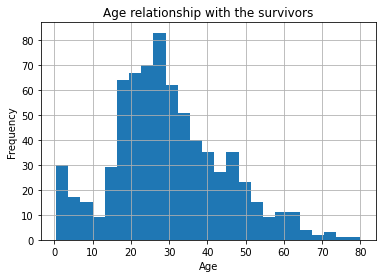

In [ ]:
#To check the distribution of ages
train_data['Age'].hist(bins=25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age relationship with the survivors')
plt.show()

Concluding Remarks from the Histogram:
Most of the passengers on the Titanic ship were from the age of 20-35 year old

In [ ]:
# Percentage of NUll values
per_age_null_val= train_data['Age'].isnull().sum()*100/train_data.shape[0]
per_age_null_val

19.865319865319865

In [ ]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
train_data[["Age","Pclass"]].corr()


,Age,Pclass
Age,1.000000,-0.369226
Pclass,-0.369226,1.000000


In [ ]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
col=['Sex']
obj_mod=LabelEncoder()
train_data['Sex']=obj_mod.fit_transform(train_data[col])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#To check how the encoding is done
obj_mod.classes_
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data[['Age','Sex']].corr()

,Age,Sex
Age,1.000000,0.093254
Sex,0.093254,1.000000


In [ ]:
train_data[['Survived','Sex']].corr()

,Survived,Sex
Survived,1.000000,-0.543351
Sex,-0.543351,1.000000


There are more females who have survived the Casuality

In [ ]:
train_data["Age"]=train_data['Age'].fillna(train_data['Age'].mean())

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
per_cabin_null=train_data['Cabin'].isnull().sum()*100/train_data['Cabin'].shape[0]
per_cabin_null
#Since the percentage is high we have to drop the column 

77.10437710437711

In [ ]:
train_data.drop('Cabin',axis=1,inplace=True)

In [ ]:
per_Embarked_null=train_data['Embarked'].isnull().sum()*100/train_data['Embarked'].shape[0]
per_Embarked_null

0.2244668911335578

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())

In [ ]:
test_data.drop('Cabin',axis=1,inplace=True)

In [ ]:
test_data[['Pclass','Fare']]

,Pclass,Fare
0,3,7.8292
1,3,7.0000
2,2,9.6875
3,3,8.6625
4,3,12.2875
...,...,...
413,3,8.0500
414,1,108.9000
415,3,7.2500
416,3,8.0500


In [ ]:
#Using a machine learning model to impute the missing values in Fare
#creating a linear regression between Pclass and fare
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
X=train_data['Pclass'].values.reshape((-1,1))
y=train_data['Fare'].values.reshape((-1,1))
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
test_data[test_data['Fare'].isnull()==True]['Pclass']

152    3
Name: Pclass, dtype: int64

In [ ]:
lr.predict([[3]])

array([[9.62747857]])

In [ ]:
test_data.fillna(9.63,inplace=True)

In [ ]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Since the passengerid,name and ticket no has no relation with the prediction of survivors we are droping it
test_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

Label Encoding and OneHot Encoding
There are two types of data: Ordinal data and Nominal Data
Ordinal Data: which have a particular order
Nominal Data: Female or Male
For Ordinal Data we do label encoding
For Nominal Data we do One Hot encoding

In [ ]:
#Encoding the Embarked Column
nominal_col=['Embarked']
train_data=pd.concat((train_data,pd.get_dummies(train_data[nominal_col])),axis=1)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# ohc=OneHotEncoder(sparse=False)
# ohc.fit_transform(train_data['Embarked'].values.reshape(-1,1))

In [ ]:
train_data.drop(['Embarked'],axis=1,inplace=True)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


Same thing needs to be done with the testing data


In [ ]:
y=train_data['Survived']
X=train_data.drop('Survived',axis=1)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for col in X.columns:
  X[col]=ss.fit_transform(X[col].values.reshape((-1,1)))
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.825209,0.735342,-0.590495,0.431350,-0.474326,-0.500240,-0.482711,-0.307941,0.616794
1,-1.572211,-1.359911,0.643971,0.431350,-0.474326,0.788947,2.071634,-0.307941,-1.621287
2,0.825209,-1.359911,-0.281878,-0.475199,-0.474326,-0.486650,-0.482711,-0.307941,0.616794
3,-1.572211,-1.359911,0.412509,0.431350,-0.474326,0.422861,-0.482711,-0.307941,0.616794
4,0.825209,0.735342,0.412509,-0.475199,-0.474326,-0.484133,-0.482711,-0.307941,0.616794
...,...,...,...,...,...,...,...,...,...
886,-0.373501,0.735342,-0.204724,-0.475199,-0.474326,-0.384475,-0.482711,-0.307941,0.616794
887,-1.572211,-1.359911,-0.821957,-0.475199,-0.474326,-0.042213,-0.482711,-0.307941,0.616794
888,0.825209,-1.359911,0.003524,0.431350,2.006119,-0.174084,-0.482711,-0.307941,0.616794
889,-1.572211,0.735342,-0.281878,-0.475199,-0.474326,-0.042213,2.071634,-0.307941,-1.621287


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(711, 9)

In [ ]:
y_train.shape

(711,)

The DataProcessing Part is now Done



In [ ]:
#Baseline Algorithm:KNN
from sklearn.base import clone
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#Setting the Parameters
n_neighbors= list(np.arange(2,200,2))
weights=['uniform','distance']
algorithm=['auto','ball_tree','kd_tree','brute']
p=[1,2]


In [ ]:
#Dictionary for parameters
params={'n_neighbors':n_neighbors,'weights':weights,'algorithm':algorithm,'p':p}
#RSCV
RSCV_Knn= RandomizedSearchCV(knn,params,20,scoring='accuracy',n_jobs=-1,cv=5,verbose=1,random_state=42)

In [ ]:
RSCV_Knn.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [2, 4, 6, 8, 10, 12, 14,
                                                        16, 18, 20, 22, 24, 26,
                                                        28, 30, 32, 34, 36, 38,
                                                        40, 42, 44, 46, 48, 50,
    

In [ ]:
KNN_best_model=clone(RSCV_Knn.best_estimator_)

In [ ]:
RSCV_Knn.score(X_test,y_test)*100


78.08988764044943

In [ ]:
#LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression



In [ ]:
lr=LogisticRegression()
penalty=['l1','l2','elastic']
C=[0.01,0.05,0.1,0.5,1.5,1.0,2.0,3.0,4.0]
max_iter=np.arange(100,200,10)
#Parametere Dictionary
set_params={'penalty':penalty,'C':C,'max_iter':max_iter}

In [ ]:
#RSCV
RSCV_lr= RandomizedSearchCV(lr,set_params,n_iter=50,scoring='accuracy',n_jobs=-1,random_state=42)

In [ ]:
#Fit the Model
RSCV_lr.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.05, 0.1, 0.5, 1.5, 1.0,
                                              2.0, 3.0, 4.0],
                                        'max_iter': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190]),
                             

In [ ]:
lr_best_estimator=clone(RSCV_lr.best_estimator_)


In [ ]:
RSCV_lr.score(X_test,y_test)*100

80.33707865168539

In [ ]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
#Model Object
Dtc= DecisionTreeClassifier()
criterion=['gini','entropy']
splitter=['best','random']
max_depth=list(np.arange(5,500,5))
min_samples_split=list(np.arange(1,10))
min_samples_leaf=list(np.arange(1,10))
max_features=['auto','sqrt','log2']
max_features.append(None)

#Set params
params={'criterion':criterion,'splitter':splitter,'max_depth':max_depth,
        'min_samples_split':min_samples_split,
       'min_samples_leaf':min_samples_leaf ,'max_features':max_features}

In [ ]:
#RSCV
RSCV_dt=RandomizedSearchCV(Dtc,params,20,scoring='accuracy',
                           n_jobs=-1,cv=5,random_state=23)

In [ ]:
#Fitting the model
RSCV_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
dt_clone=clone(RSCV_dt.best_estimator_)

In [ ]:
RSCV_dt.score(X_test,y_test)

0.8089887640449438

In [ ]:
#RandomForest


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Model
rf=RandomForestClassifier()
RSCV_rf=RandomizedSearchCV(rf,random_grid,n_iter=50,
                           scoring='accuracy',cv=5, 
                           verbose=1, random_state=42)

In [ ]:
RSCV_rf.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  6.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_clone=clone(RSCV_rf.best_estimator_)

In [ ]:
RSCV_rf.score(X_test,y_test)

0.7865168539325843

In [ ]:
from sklearn.svm import SVC
svm=SVC(probability=True)
C=list(np.arange(1,50,1))
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
RSCV_svc=RandomizedSearchCV(svm,param_grid,cv=5,random_state=23,
                            n_jobs=-1,n_iter=25,scoring='accuracy',verbose=1)

In [ ]:
RSCV_svc.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   11.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=True, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=25, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=23, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [ ]:
RSCV_svc.score(X_test,y_test)

0.8258426966292135

In [ ]:
svc_clone=clone(RSCV_svc.best_estimator_)

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators={('knn',KNN_best_model),('lr',lr_best_estimator),('dt',dt_clone),('rf',rf_clone),('svc',svc_clone)}
vc =VotingClassifier(estimators=estimators,voting='soft',n_jobs=-1)
vc.fit(X_train,y_train)

VotingClassifier(estimators={('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=75,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=9,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
     

In [ ]:
prediction = vc.predict(X_test)
accuracy_score(y_test,prediction)

0.8089887640449438

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
ada.score(X_test,y_test)

0.8146067415730337

In [ ]:
#Feature Selection by using Lasso Selection


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso


In [ ]:
sfm =SelectFromModel(Lasso())
sfm.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
sfm.get_support()

array([False, False, False, False, False, False, False, False, False])

In [ ]:
dt_clone.fit(X,y)
dt_clone.feature_importances_

array([0.16967909, 0.49078568, 0.12133245, 0.03541822, 0.00166701,
       0.1677195 , 0.00301908, 0.        , 0.01037897])

In [ ]:
rf_clone.fit(X,y)
rf_clone.feature_importances_

array([0.12641141, 0.40612191, 0.15214369, 0.04518682, 0.032896  ,
       0.20005134, 0.01416054, 0.00797284, 0.01505546])